# Library
--
https://drive.google.com/file/d/1L2usSVfQdtGc50dDlkHBBCD2Gaz_8Ma6/view?usp=sharing

google colab link

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import  ttest_ind,ttest_rel,ttest_1samp,chi2_contingency,kstest,norm,f_oneway,kruskal,pearsonr,spearmanr,levene,mannwhitneyu
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

---
---
# AGENDA: Understand the factors affecting the demand for shared electric cycles in the Indian market.

In [17]:
!gdown 1KuRlNM_9XB3Py0BK0qWFlUpLMpFPSnUN

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
data = pd.read_csv("G:/My Drive/Datasets/bike_sharing.txt")   #original data
df = pd.read_csv("G:/My Drive/Datasets/bike_sharing.txt")  #dataset I will work on

# for collab
# !gdown 1GYFZEjY79NtaJp-ZLinY8A0b1sPJOuJd
# data = pd.read_csv('bike_sharing.txt')   #original data
# df = pd.read_csv("bike_sharing.txt")  #dataset I will work on

----
----

# Basic EDA
- Dataset Contains total **10886 record** and **10 Columns**
- **No Null Values** were Found
- Total **4 Categorical Features**
- we have data ranging from **year 2011 and 2012**

In [19]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Converting Datetime Feature from object to datetime

In [21]:
df.loc[:,'datetime']=pd.to_datetime(df.loc[:,'datetime'])

In [22]:
df['datetime'].dt.year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

Creating a Month Columns

In [23]:
df['month'] = df['datetime'].dt.month

In [24]:
df['month name']=df['datetime'].dt.strftime('%b')

changing attributes of my SEASON from numeric to well-defined Labels

In [25]:
def season(x) :
    if x == 1 :
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else :
        return 'winter'
df.loc[:,'season'] = df.loc[:,'season'].apply(season)

In [26]:
def weather(x) :
    if x == 1 :
        return 'clear skies'
    elif x == 2 :
        return 'mist'
    elif x == 3 :
        return 'light snowfall/rainfall'
    else :
        return 'Extreme'
df.loc[:,'weather'] = df.loc[:,'weather'].apply(weather)

In [27]:
df.loc[:,'season':].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name
count,10886,10886.000000,10886.000000,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886
unique,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,winter,NaN,NaN,clear skies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May
freq,2734,NaN,NaN,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,912
mean,NaN,0.028569,0.680875,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,NaN
std,NaN,0.166599,0.466159,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,NaN
min,NaN,0.000000,0.000000,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
25%,NaN,0.000000,0.000000,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,NaN
50%,NaN,0.000000,1.000000,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,NaN
75%,NaN,0.000000,1.000000,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,NaN


----
# Univariate Analysis

----
## Count of categorical values
Data was almost equally distributed for most weather, working day, holiday
- For weather, we can say days were mostly **Clear**
- We can say for holidays there were **fewer records**
- We can say yolo products being taken **more on working days** than holidays
Again the reason behind it being taken less on holidays is might be people are either resting or they might take a trip

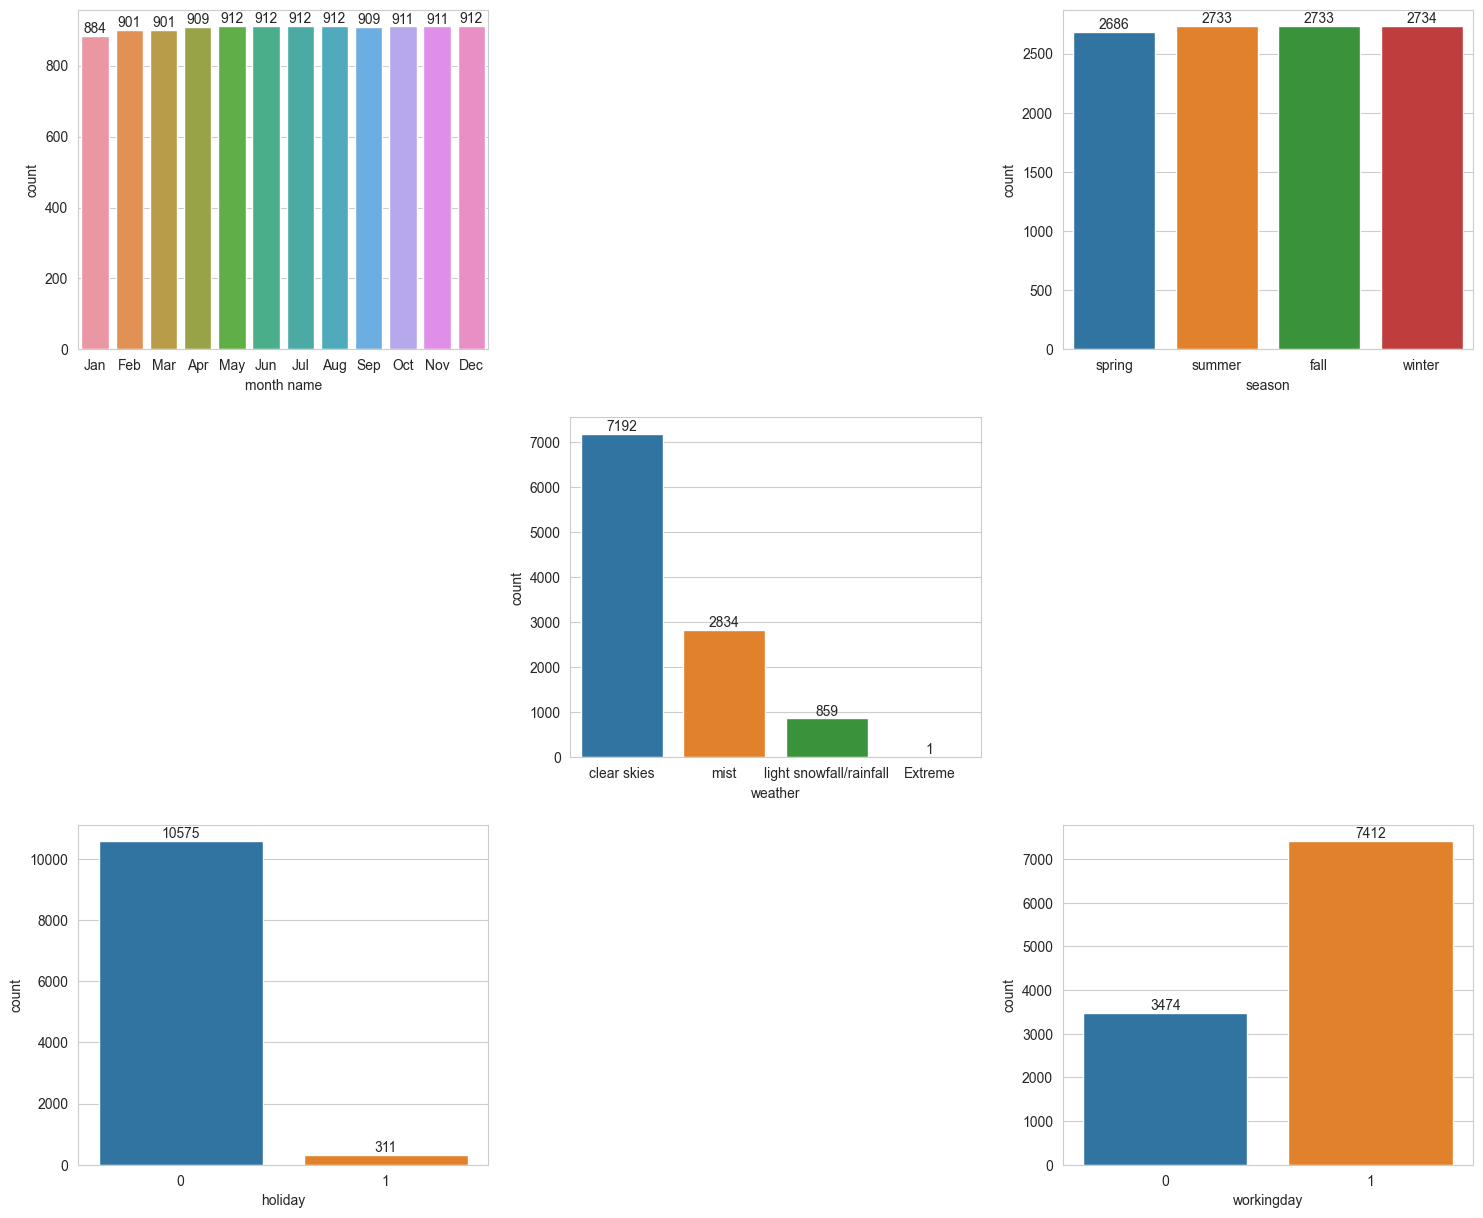

In [28]:
cat_values = ['month name', 'season', 'weather', 'holiday', 'workingday']
plot = [331,333,335,337,339]
plt.figure(figsize=(18, 15))

for i in range(len(cat_values)):
    plt.subplot(plot[i])

    ax = sns.countplot(x=df[cat_values[i]])
    ax.bar_label(ax.containers[0])

plt.show()

----
## Checking Outliers
- My Data has some Outliers
- We can see There are more Registered users than Casual Users
- For Anova Testing, I am removing a few outliers from count

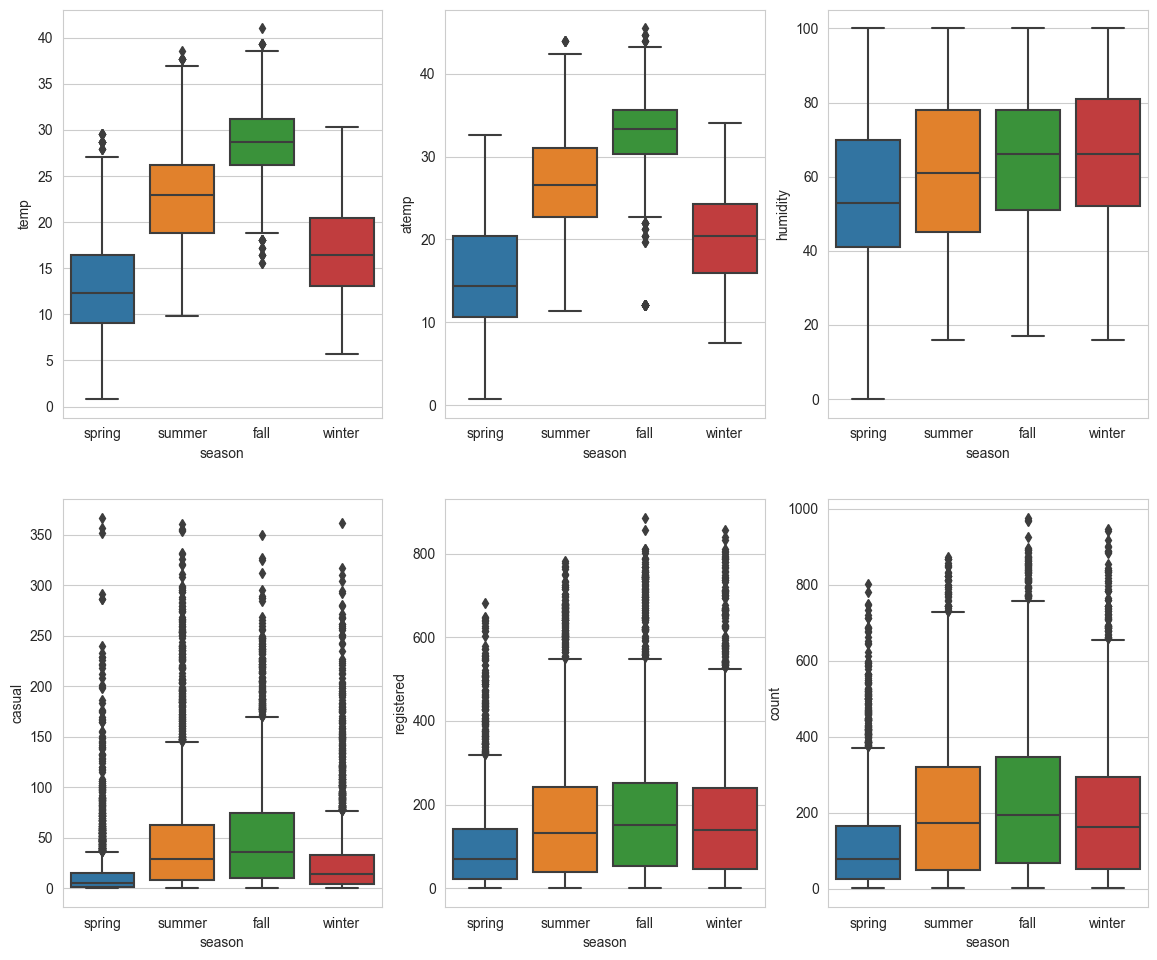

In [29]:
cat_val = ['temp','atemp','humidity','casual','registered','count']
plot = [331,332,333,334,335,336]
plt.figure(figsize=(14,18))

for i in range(len(cat_val)) :

    plt.subplot(plot[i])
    sns.boxplot(data = df, y =cat_val[i],x = 'season',orient = 'v')

plt.show()

----
## Treating Outliers
I am removing a small percentage of outliers from count it will affect my Anova analysis

In [30]:
p75  = np.percentile(df['count'],75)
p25  = np.percentile(df['count'],25)

iqr = p75 -p25

hw = (iqr *1.5) + p75


In [31]:
print(f"outliers percent: {len(df[df['count'] >=hw]) / df.shape[0] * 100}")

outliers percent: 2.783391512033805


In [32]:
df[df['count'] >=hw]['count'].describe()

count    303.000000
mean     750.085809
std       77.844210
min      647.000000
25%      681.000000
50%      731.000000
75%      812.000000
max      977.000000
Name: count, dtype: float64

In [33]:
df_new = df[df['count'] < 812]
df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name
0,2011-01-01 00:00:00,spring,0,0,clear skies,9.84,14.395,81,0.0000,3,13,16,1,Jan
1,2011-01-01 01:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0000,8,32,40,1,Jan
2,2011-01-01 02:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0000,5,27,32,1,Jan
3,2011-01-01 03:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0000,3,10,13,1,Jan
4,2011-01-01 04:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0000,0,1,1,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,clear skies,15.58,19.695,50,26.0027,7,329,336,12,Dec
10882,2012-12-19 20:00:00,winter,0,1,clear skies,14.76,17.425,57,15.0013,10,231,241,12,Dec
10883,2012-12-19 21:00:00,winter,0,1,clear skies,13.94,15.910,61,15.0013,4,164,168,12,Dec
10884,2012-12-19 22:00:00,winter,0,1,clear skies,13.94,17.425,61,6.0032,12,117,129,12,Dec


In [34]:
df_new[['casual','registered','count']].describe()

,casual,registered,count
count,10809.000000,10809.000000,10809.000000
mean,35.577759,151.239708,186.817467
std,49.809455,142.599259,172.735849
min,0.000000,0.000000,1.000000
25%,4.000000,35.000000,42.000000
50%,16.000000,117.000000,143.000000
75%,48.000000,220.000000,281.000000
max,367.000000,781.000000,811.000000


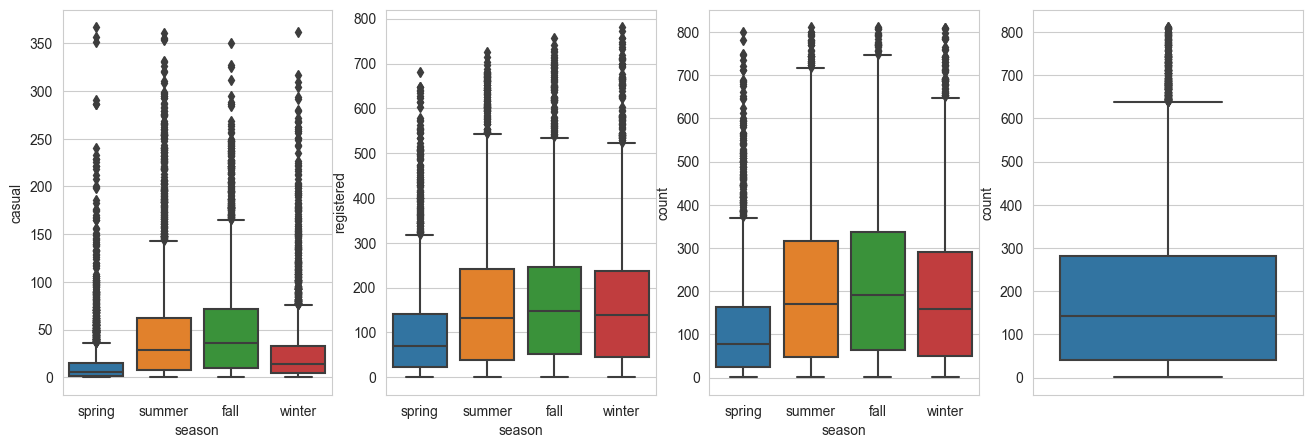

In [35]:
col = ['casual','registered','count']
plot = [141,142,143]

plt.figure(figsize=(16,5))

for i in range(len(col)) :
    plt.subplot(plot[i])
    sns.boxplot(data = df_new,y= col[i] ,x = 'season',orient = 'v')

plt.subplot(144)
sns.boxplot(y = df_new['count'] , orient='v')
plt.show()

----
----
# Bi-Variate Category vs Numerical Analysis
Target Variable is Count </br>
And I My confidence level 95%
**Season vs Count**
- Data was not Normally Distributed (Ks Test)
- Mean rank of Season Group was not the Same (Using Kruskal Test)
    **Inference**  : There's a difference in the usage of Yulu bikes in different seasons.
- Well for Season we can see **Highest Number** of users during **Fall season** (Lineplot)
- Season and Count are Highly Dependent (chi square test) on each other

**Weather vs Count**
- Mean rank of weather group was not Same
    **Inference** : There's difference in the usage of Yulu bikes in different weather.
- Weather and Count are Dependent on each other
- People were mostly found using our product when the **skies were clear** (line plot)

**Season vs Weather**
Season and Weather are dependent on each other

**Holiday vs Count**
- Mean rank for number of users when there was Holiday and No Holiday were Similar
    **Inference** : There's no Difference in the usage of Yulu Bikes on holidays
- Therefore, Holiday has no statistical significance for the user
- Infant data was also Independent as in there's no dependency of holiday for the count of users

**Working Day vs Count**
- Mean rank for number of users when there was Holiday and No Holiday were Similar
    **Inference** : There's no Difference in the usage of Yulu Bikes on working days
- There is relationship b/w count of users and working days

**Month vs Count**
- The Number of counts varies significantly between the months
- June Had the Highest number of users
- Count of users and Month are dependent

**Problem Indentification** : When there is Light Rainfall

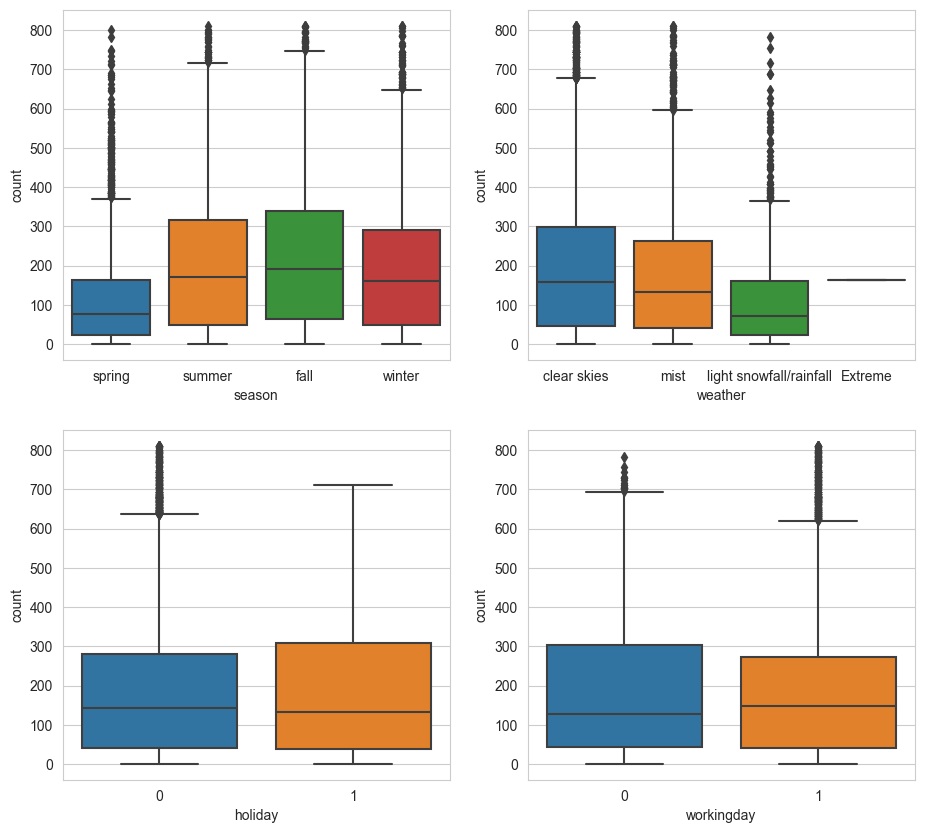

In [36]:
cols = ['season','weather','holiday','workingday']
plot = [221,222,223,224]
plt.figure(figsize=(11,10))
for i in range(len(cols)) :
    plt.subplot(plot[i])
    sns.boxplot(data=df_new ,x = cols[i],y = 'count',orient = 'v')

----
## Count vs Seasons
- Count plot is not Normal
- Mean Ranks of Count for each Season are not Same
- Count and Season highly Dependent
- Fall Had the Highest Number of users
- Spring has the lowest Number of users

[Text(0.5, 1.0, 'Count of bikes')]

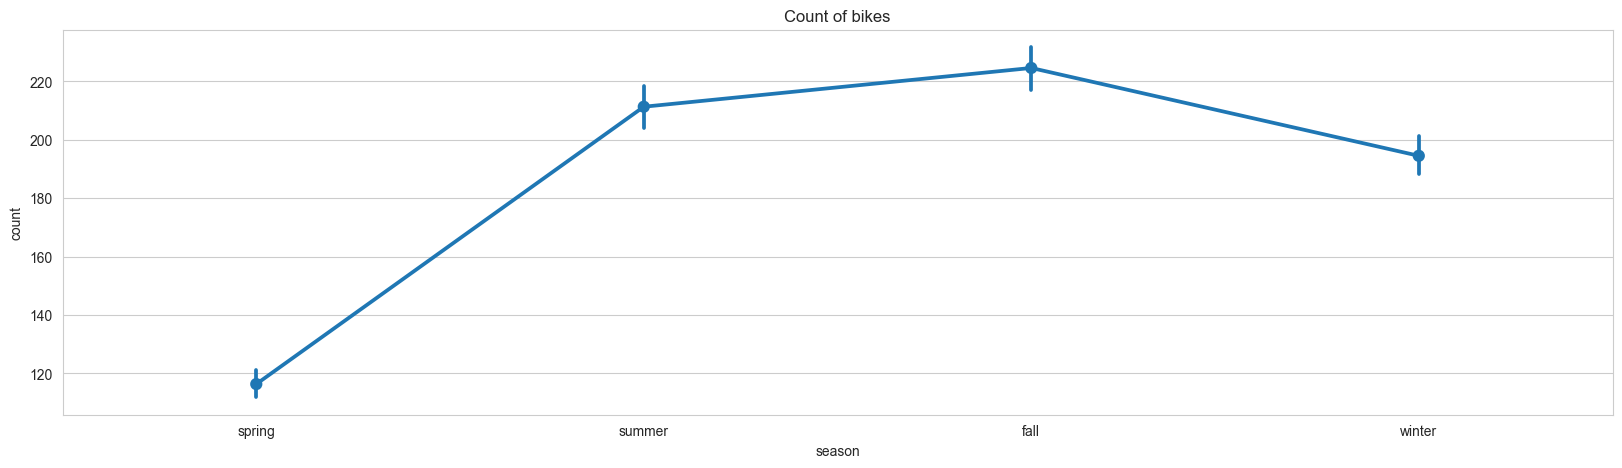

In [37]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='season' , y ='count')
ax.set(title='Count of bikes')

### Checking weather Data is Normally Distributed or not
Ho: Data is Normal Distributed </br>
Ha : Data is not Normally Distributed </br>
Result : Reject Ho

Used qqplot , tired to convert data to log , used KS test to further test it  

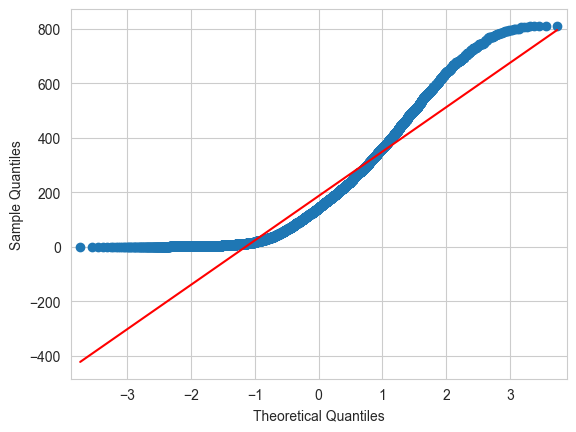

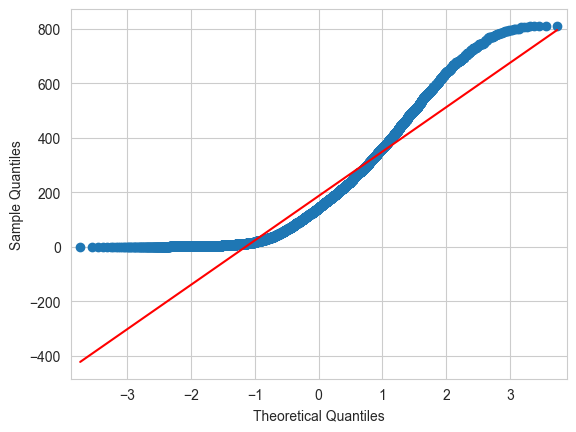

In [110]:
qqplot(df_new['count'],line = 'r')

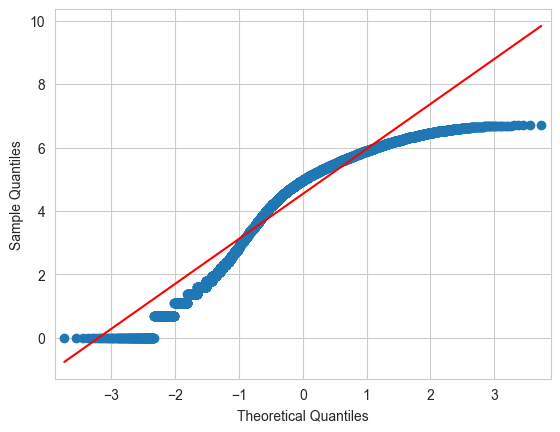

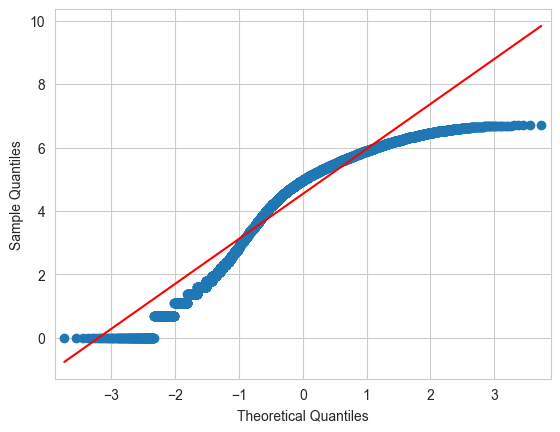

In [39]:
qqplot(np.log(df_new['count']),line = 'r')

In [40]:
kstest(np.log(df_new[df_new['season']=='fall']['count']),'norm',args=(0,1))

KstestResult(statistic=0.9284829957604004, pvalue=0.0)

<Axes: xlabel='count', ylabel='Count'>

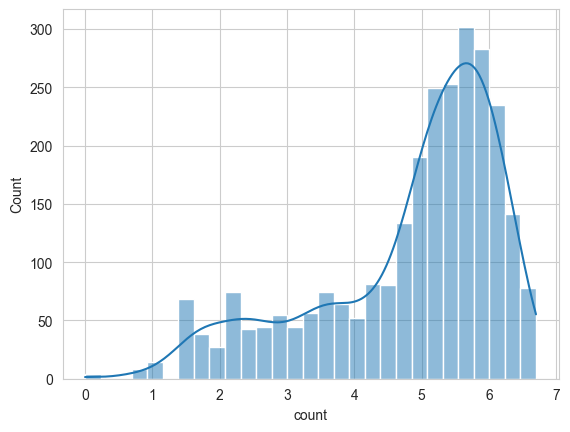

In [41]:
sns.histplot(x = np.log(df_new[df_new['season']=='fall']['count']),kde= True)

<Axes: xlabel='count', ylabel='Count'>

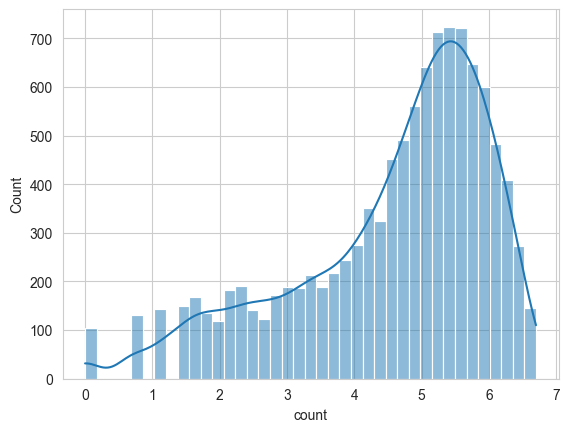

In [42]:
sns.histplot(x = np.log(df_new['count']),kde= True)

In [43]:
log_fall = np.log(df_new[df_new['season']=='fall']['count'])
log_c = np.log(df_new['count'])

In [44]:
z1 = (log_fall - log_fall.mean())/log_fall.std()
z2= (log_c - log_c.mean())/log_c.std()

In [45]:
print(kstest(z1,norm.cdf))
print(kstest(z2,norm.cdf))

KstestResult(statistic=0.15354205322664727, pvalue=7.320431636746118e-56)
KstestResult(statistic=0.12311276477930089, pvalue=3.052106087062763e-143)


### Since Data is Not Normally distributed , Instead of ANOVA Test we perform KRUSKAL WALLIS test
Ho : Mean Ranks of Groups are Same </br>
Ha : Mean Ranks of Groups are not Same </br>
Result : Reject Ho


In [46]:
def krus(*samples, alpha=0.05):
    test_stat, p_value = kruskal(*samples)
    print(f"test_stat: {test_stat}")
    print(f"p_value: {p_value}")
    print(f"alpha: {alpha}")
    if alpha > p_value:
        print("Reject Ho")
    else:
        print("Fail to reject Ho")


In [47]:
krus(df_new[df_new['season'] == 'spring']['count'],
     df_new[df_new['season'] == 'summer']['count'],
     df_new[df_new['season'] == 'fall']['count'],
     df_new[df_new['season'] == 'winter']['count'],
     alpha=0.05)

test_stat: 667.0006662238128
p_value: 3.001224405973101e-144
alpha: 0.05
Reject Ho


### Anova Test
Ho : Data is Similar for all season </br>
Ha : Data is Not Similar </br>
Result : Data is not similar

In [48]:
f_oneway(df_new[df_new['season'] == 'spring']['count'],
     df_new[df_new['season'] == 'summer']['count'],
     df_new[df_new['season'] == 'fall']['count'],
     df_new[df_new['season'] == 'winter']['count'])

F_onewayResult(statistic=225.2513133333652, pvalue=9.37614480795457e-142)

### Creating Bins to perform Chi Square test
- Fall had the Highest Amount of users according to Line Plot

<Axes: xlabel='season', ylabel='count'>

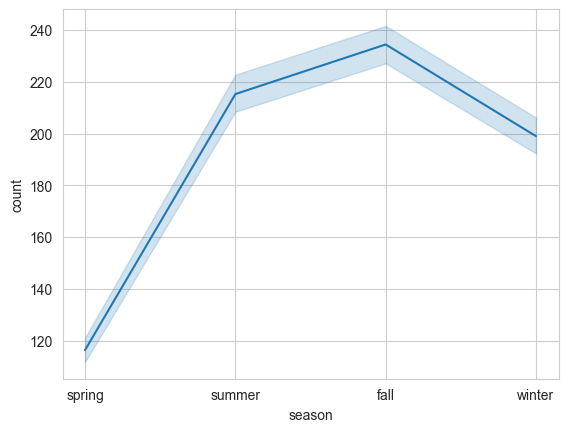

In [49]:
sns.lineplot(data = df, x = 'season',y = 'count')

Hmm , Fall had the Highest Amount of users according to Line Plot

In [50]:
bins = [0,np.percentile(df_new['count'],25),np.percentile(df_new['count'],50),np.percentile(df_new['count'],75),np.max(df_new['count'])]
labels  =  ['Low','Medium-Low','Medium-High','High']
df_new.loc[:, 'count_bins'] = pd.cut(df_new['count'], bins=bins, labels=labels)
df_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name,count_bins
0,2011-01-01 00:00:00,spring,0,0,clear skies,9.84,14.395,81,0.0,3,13,16,1,Jan,Low
1,2011-01-01 01:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,8,32,40,1,Jan,Low
2,2011-01-01 02:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,5,27,32,1,Jan,Low
3,2011-01-01 03:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,3,10,13,1,Jan,Low
4,2011-01-01 04:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,0,1,1,1,Jan,Low


In [51]:
pd.crosstab(index=df_new['count_bins'],columns=df_new['season'])

season,fall,spring,summer,winter
count_bins,,,,
Low,566,884,651,624
Medium-Low,484,1020,544,635
Medium-High,727,530,711,750
High,914,252,810,707


In [52]:
def chi2(observed) :
        chi_stat,p_value ,dof , expected = chi2_contingency(observed)
        print("chi_stat :" ,chi_stat)
        print(f"p_ value : {p_value}")
        print(f"dof : {dof}")
        print(f"expected : {expected}")
        print('Reject ho' if p_value < 0.05 else "Fail to reject Ho")

### Checking weather Count and Contingency are Dependent or Not
Ho : Categories are Independent </br>
Ha : Categories are not Dependent </br>
Result  : Reject Ho

In [53]:
chi2(pd.crosstab(index=df_new['count_bins'],columns=df_new['season']))

chi_stat : 774.4715338254673
p_ value : 6.63507781099715e-161
dof : 9
expected : [[678.41382182 677.15329818 684.71644    684.71644   ]
 [667.95753539 666.71644    674.1630123  674.1630123 ]
 [676.67110741 675.41382182 682.95753539 682.95753539]
 [667.95753539 666.71644    674.1630123  674.1630123 ]]
Reject ho


----
## Count vs Weather
- As Count is not normally Distributed it's better to go ahead with kruskal test
- Mean rank of data was not similar
- Already created Bins so went ahead CHI 2  Test of Count (count_bins) and weather
- We can see lowest amount of users during light rainfall

[Text(0.5, 1.0, 'Count of bikes')]

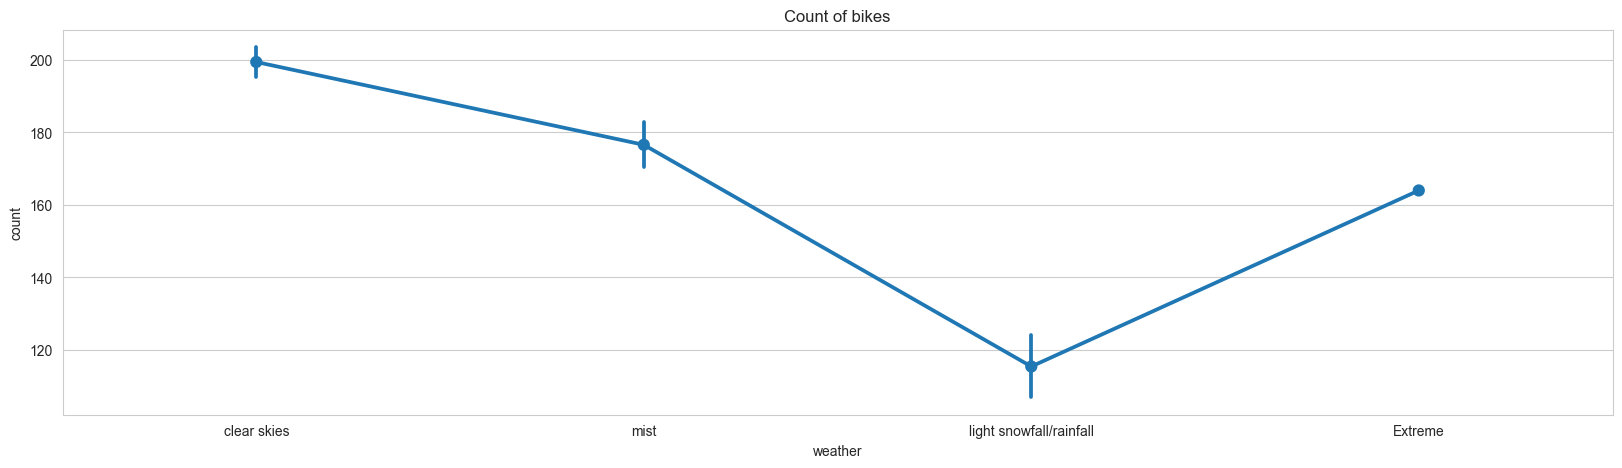

In [54]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='weather' , y ='count')
ax.set(title='Count of bikes')

### Kruskal Wallis Test
Ho : Mean rank of Data is similar </br>
Ha : Mean rank of Data are not similar </br>
Result : Reject Ho

In [55]:
df_new['weather'].unique()

array(['clear skies', 'mist', 'light snowfall/rainfall', 'Extreme'],
      dtype=object)

In [56]:
krus(df_new[df_new['weather']=='clear skies']['count'],df_new[df_new['weather']=='mist']['count'],df_new[df_new['weather']=='light snowfall/rainfall']['count'],df_new[df_new['weather']=='Extreme']['count'],alpha=0.05)

test_stat: 201.25660161551275
p_value: 2.2575710204666005e-43
alpha: 0.05
Reject Ho


### Checking Dependency
Ho : Data is Independent </br>
Ha : Data is dependent </br>
Result : Reject Ho

<Axes: xlabel='weather', ylabel='count'>

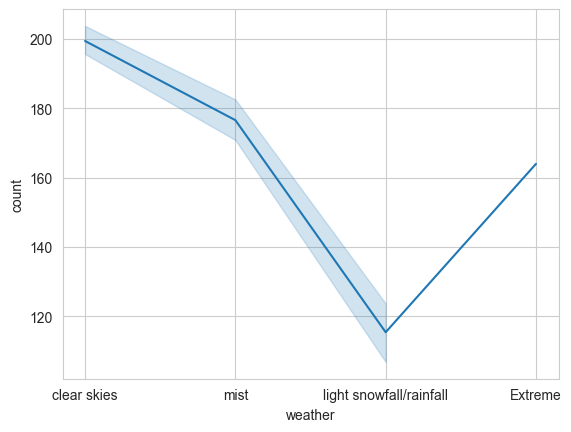

In [57]:
sns.lineplot(x = df_new['weather'],y = df_new['count'])

In [58]:
df_new[df_new['weather'] == 'Extreme']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name,count_bins
5631,2012-01-09 18:00:00,spring,0,1,Extreme,8.2,11.365,86,6.0032,6,158,164,1,Jan,Medium-High


In [59]:
pd.crosstab(index=df_new['count_bins'],columns=df_new['weather'])

weather,Extreme,clear skies,light snowfall/rainfall,mist
count_bins,,,,
Low,0,1702,300,723
Medium-Low,0,1633,309,741
Medium-High,1,1826,153,738
High,0,1968,93,622


In [60]:
chi2(pd.crosstab(index=df_new['count_bins'],columns=df_new['weather']))

chi_stat : 215.95968516632936
p_ value : 1.4797181491546785e-41
dof : 9
expected : [[2.52104728e-01 1.79725460e+03 2.15549542e+02 7.11943751e+02]
 [2.48219077e-01 1.76955380e+03 2.12227311e+02 7.00970673e+02]
 [2.51457119e-01 1.79263780e+03 2.14995837e+02 7.10114904e+02]
 [2.48219077e-01 1.76955380e+03 2.12227311e+02 7.00970673e+02]]
Reject ho


----
## Season vs Weather
Ho : Season and Weather are Independent </br>
Ha : Seaosn and Weather are Dependent </br>
Result : Reject Ho

<Axes: xlabel='season', ylabel='count'>

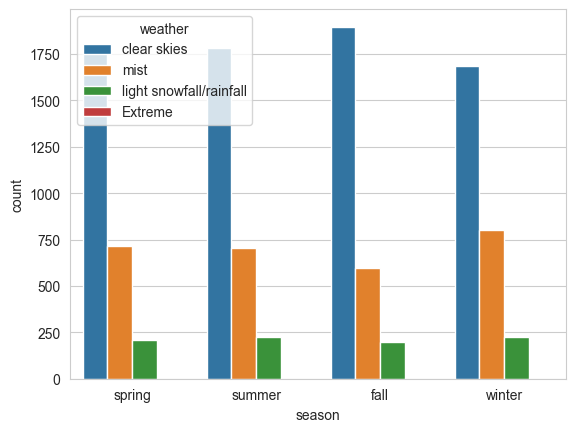

In [61]:
sns.countplot(data = df_new ,x = 'season',hue = 'weather')

In [62]:
chi2(pd.crosstab(index=df_new['season'],columns=df_new['weather']))

chi_stat : 48.1504064511566
p_ value : 2.393961363607159e-07
dof : 9
expected : [[2.48959201e-01 1.77483014e+03 2.12860117e+02 7.03060783e+02]
 [2.48496623e-01 1.77153243e+03 2.12464613e+02 7.01754464e+02]
 [2.51272088e-01 1.79131872e+03 2.14837635e+02 7.09592377e+02]
 [2.51272088e-01 1.79131872e+03 2.14837635e+02 7.09592377e+02]]
Reject ho


-----
## Holiday vs Count
- For Holiday we can say data is similar
- Data is independent

[Text(0.5, 1.0, 'Count of bikes')]

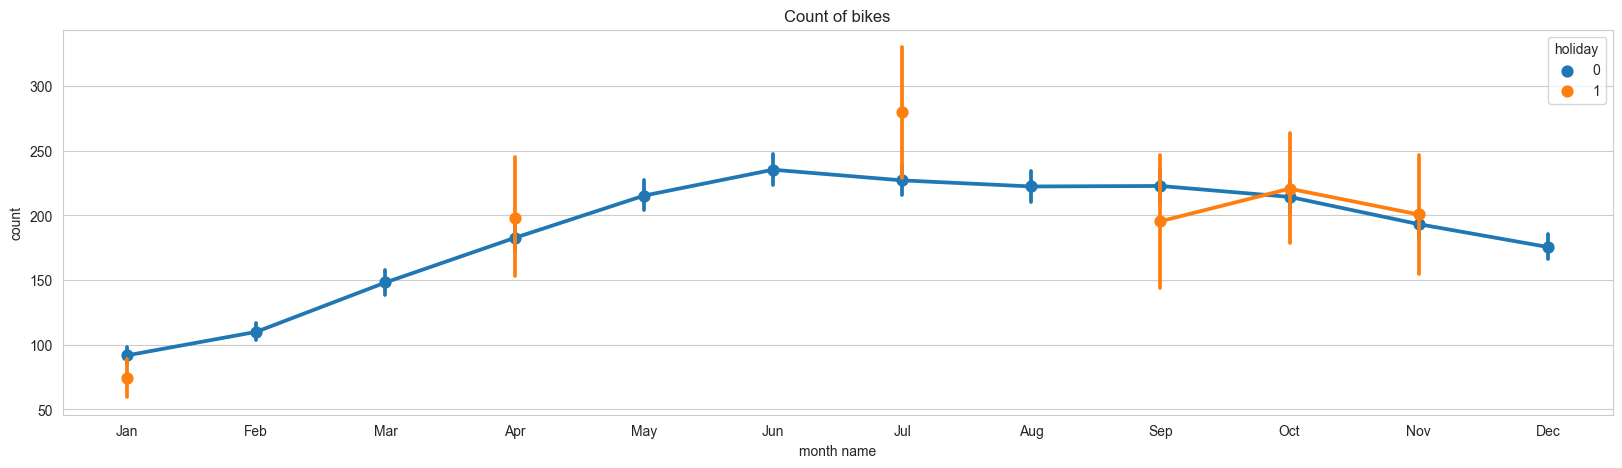

In [63]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='month name' , y ='count',hue='holiday')
ax.set(title='Count of bikes')

### Kruskal Test
Ho : Mean rank of Data is similar
Ha : Mean rank of Data are not similar
Result : Fail to reject Ho

In [64]:
krus(df_new[df_new['holiday']==1]['count'],df_new[df_new['holiday']==0]['count'],alpha=0.05)

test_stat: 0.0024076225815761274
p_value: 0.9608654788713327
alpha: 0.05
Fail to reject Ho


### Checking Dependency
Ho : Data is Independent  </br>
Ha : Data is dependent
Result : Fail to Reject Ho

In [65]:
chi2(pd.crosstab(index=df_new['count_bins'],columns=df_new['holiday']))

chi_stat : 3.469914866337925
p_ value : 0.32468507526172025
dof : 3
expected : [[2646.59542973   78.40457027]
 [2605.80386715   77.19613285]
 [2639.79683597   78.20316403]
 [2605.80386715   77.19613285]]
Fail to reject Ho


-----
## Working Day vs Count
- For Working Days we can say Data was Similar
- Data is Independent

[Text(0.5, 1.0, 'Count of bikes')]

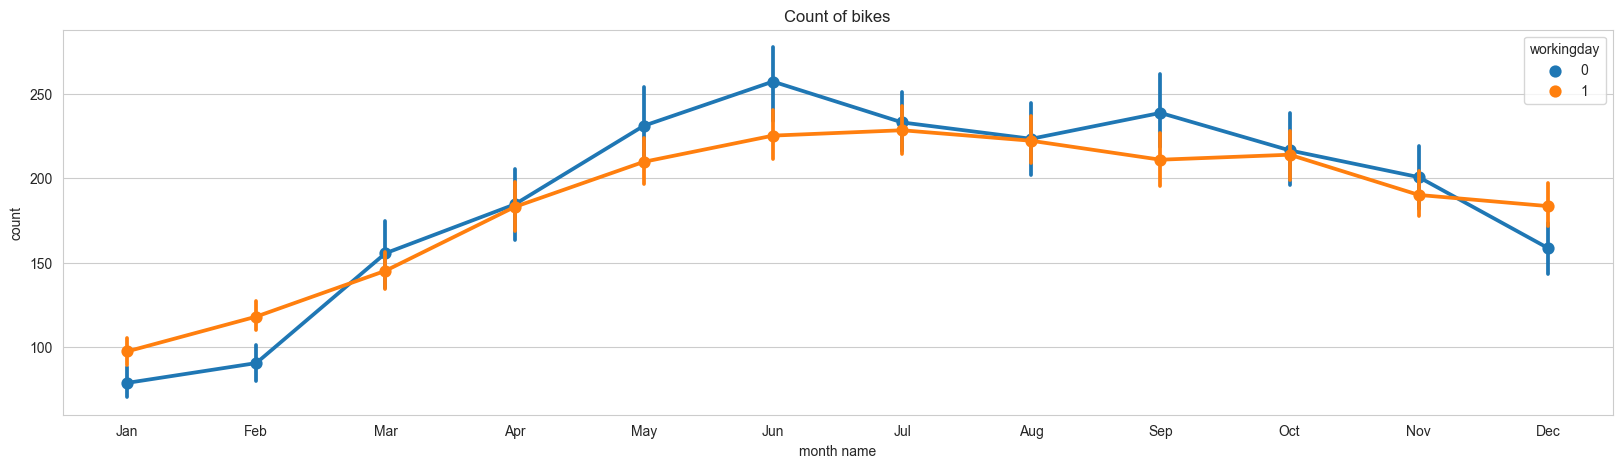

In [66]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='month name' , y ='count',hue='workingday')
ax.set(title='Count of bikes')

### T-Test
Ho : There's no Difference b/w working days and working Days </br>
Ha : There's is difference
Result : Fail to reject Ho

In [67]:
ttest_ind(df[df['workingday']==1]['count'],df[df['workingday']==0]['count'],alternative = 'greater')

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.11322402113180674)

### Kruskal Test
Ho : Mean rank of Data is similar </br>
Ha : Mean rank of Data are not similar </br>
Result : Fail to reject Ho

In [68]:
krus(df_new[df_new['workingday']==1]['count'],df_new[df_new['workingday']==0]['count'],alpha=0.05)

test_stat: 0.8526201479085784
p_value: 0.35581216587915265
alpha: 0.05
Fail to reject Ho


### Checking Dependency
Ho : Data is Independent </br>
Ha : Data is dependent </br>
Result : Reject Ho

In [69]:
chi2(pd.crosstab(index=df_new['count_bins'],columns=df_new['workingday']))

chi_stat : 91.94973566442624
p_ value : 8.350881656359138e-20
dof : 3
expected : [[ 875.81182348 1849.18817652]
 [ 862.31307244 1820.68692756]
 [ 873.56203164 1844.43796836]
 [ 862.31307244 1820.68692756]]
Reject ho


-----
## Month vs Count
we can see the highest number of users during the month of june,
and we can see the falls begin after october, and we start seeing demand after february

[Text(0.5, 1.0, 'Count of bikes')]

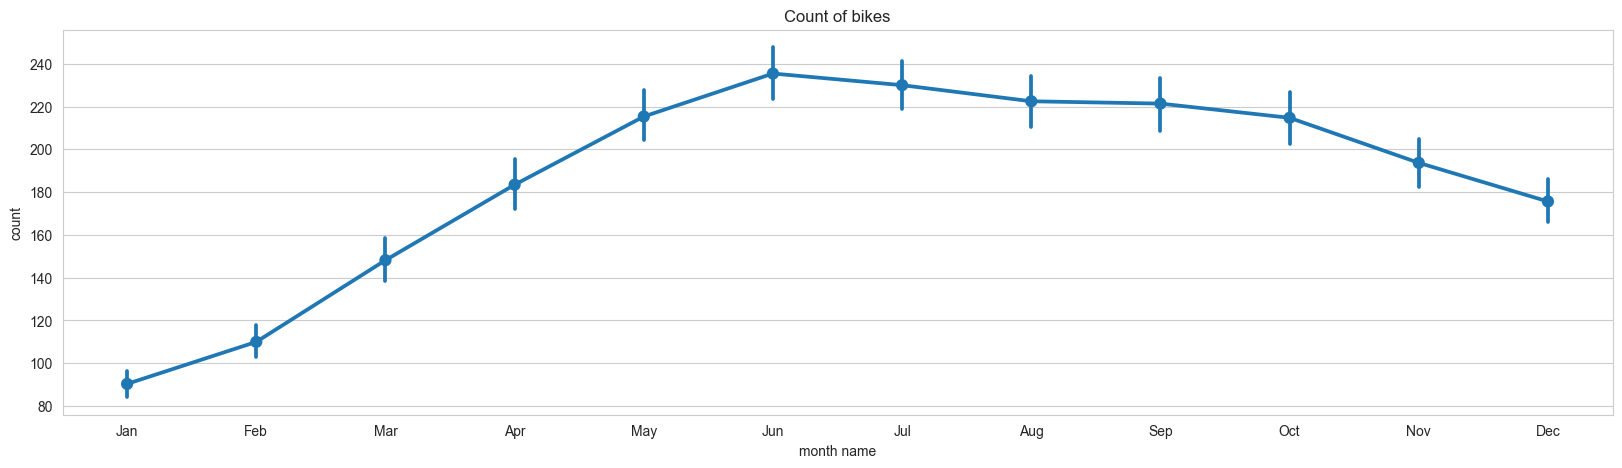

In [70]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='month name' , y ='count')
ax.set(title='Count of bikes')

### Kruskal Test
Ho: Mean Data of groups are similar
Ha: Mean Data of groups are not similar
Result: Reject Ho

In [71]:
krus(df_new[df_new['month name']=='Jan']['count'],
     df_new[df_new['month name']=='Feb']['count'],
     df_new[df_new['month name']=='Mar']['count'],
     df_new[df_new['month name']=='Apr']['count'],
     df_new[df_new['month name']=='May']['count'],
     df_new[df_new['month name']=='Jun']['count'],
     df_new[df_new['month name']=='Jul']['count'],
     df_new[df_new['month name']=='Aug']['count'],
     df_new[df_new['month name']=='Sep']['count'],
     df_new[df_new['month name']=='Oct']['count'],
     df_new[df_new['month name']=='Nov']['count'],
     df_new[df_new['month name']=='Dec']['count']
     ,alpha=0.05
     )

test_stat: 785.7698604844848
p_value: 2.1506527201277294e-161
alpha: 0.05
Reject Ho


### Checking Dependency of Data
Ho :Data is Independent
Ha :Data is Dependent

In [72]:
chi2(pd.crosstab(index = df_new['month name'], columns= df_new['count_bins']))

chi_stat : 940.2990228953716
p_ value : 3.433040722859936e-176
dof : 33
expected : [[228.91109261 225.38292164 228.32306411 225.38292164]
 [225.63373115 222.15607364 225.05412157 222.15607364]
 [229.91951152 226.37579795 229.32889259 226.37579795]
 [227.14635952 223.6453881  226.56286428 223.6453881 ]
 [222.86057915 219.4256638  222.28809326 219.4256638 ]
 [227.9026737  224.39004533 227.31723564 224.39004533]
 [227.39846424 223.89360718 226.8143214  223.89360718]
 [227.14635952 223.6453881  226.56286428 223.6453881 ]
 [228.40688315 224.88648349 227.82014988 224.88648349]
 [229.66740679 226.12757887 229.07743547 226.12757887]
 [225.12952169 221.65963549 224.55120733 221.65963549]
 [224.87741697 221.41141641 224.29975021 221.41141641]]
Reject ho


----
----
# Bi-Variate Category Numerical vs Numerical Analysis
Target Variable is count </br>

**Temp vs Atemp**
- There is a strong **positive linear relationship** between the **temp and atemp** variables, and that this relationship is statistically significant. </br>

**Temp vs Count**
-  There is a **positive moderate realtionship** b/w **temp and count** , and relation is statistically significant </br>
**Inference** When There's a rise in temperaure we can expect users to rent Yulu Bike ; Reason can be people want to avoid walking   

**Humidity vs Count**
- There is a **weak negative correlation** between humidity and count </br>
**Inference:** When Ever Humidity is High , we can Expect Less Number of users

**Hour vs Count**
-  I can see there's influx of users b/w 6 to 9 am and 3pm to 5pm ,  on the days where Humidity is high we can expect Low Numbers

**Problem Identified** : Negative Correlation with Humidity ; WHen Humidity is high we can see less number of users

<Axes: >

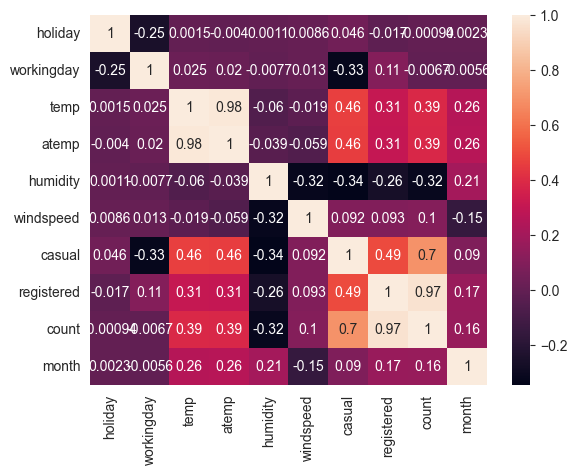

In [73]:
sns.heatmap(df_new.corr(),annot = True)

----
### Standardizing and Normalizing Temp and Count

In [74]:
df_ct = df[['count','temp']]
df_ht = df[['count','humidity']]

In [75]:
df_st=StandardScaler().fit_transform(df_ct)
df_st

array([[-0.9692938 , -1.33366069],
       [-0.83679677, -1.43890721],
       [-0.88096245, -1.43890721],
       ...,
       [-0.13014594, -0.80742813],
       [-0.34545361, -0.80742813],
       [-0.57180271, -0.91267464]])

In [76]:
df_sh=StandardScaler().fit_transform(df_ht)
df_sh

array([[-0.9692938 ,  0.99321305],
       [-0.83679677,  0.94124921],
       [-0.88096245,  0.94124921],
       ...,
       [-0.13014594, -0.04606385],
       [-0.34545361, -0.04606385],
       [-0.57180271,  0.21375537]])

#### Standardization

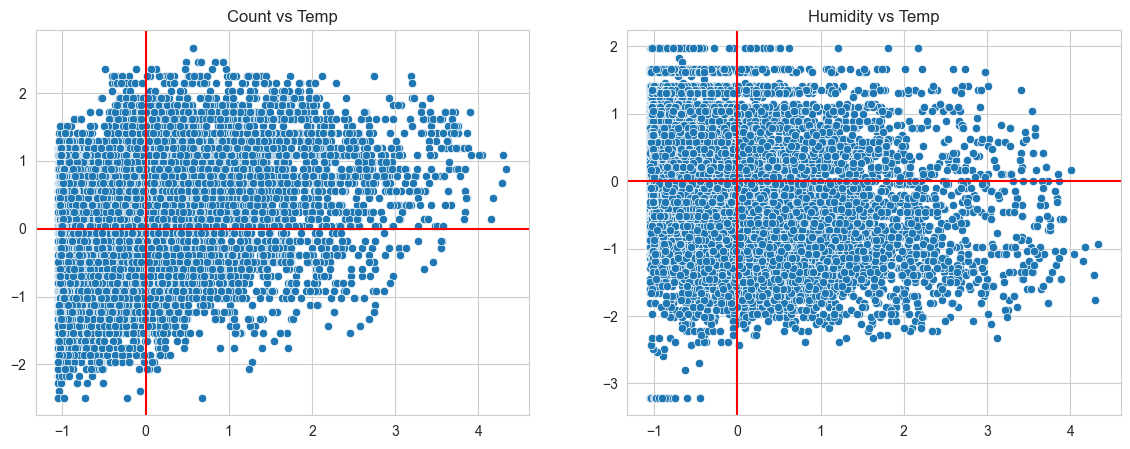

In [77]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.scatterplot(x=df_st[:,0],y=df_st[:,1])
plt.axhline(0,color="red")
plt.axvline(0,color="red")
plt.title("Count vs Temp")


plt.subplot(122)
sns.scatterplot(x=df_sh[:,0],y=df_sh[:,1])
plt.axhline(0,color="red")
plt.axvline(0,color="red")
plt.title("Humidity vs Temp")

plt.show()


#### Normailzation

In [78]:
df_nt=MinMaxScaler().fit_transform(df_ct)
df_nt

array([[0.01536885, 0.2244898 ],
       [0.03995902, 0.20408163],
       [0.0317623 , 0.20408163],
       ...,
       [0.17110656, 0.32653061],
       [0.13114754, 0.32653061],
       [0.08913934, 0.30612245]])

In [79]:
df_nh=MinMaxScaler().fit_transform(df_ht)
df_nh

array([[0.01536885, 0.81      ],
       [0.03995902, 0.8       ],
       [0.0317623 , 0.8       ],
       ...,
       [0.17110656, 0.61      ],
       [0.13114754, 0.61      ],
       [0.08913934, 0.66      ]])

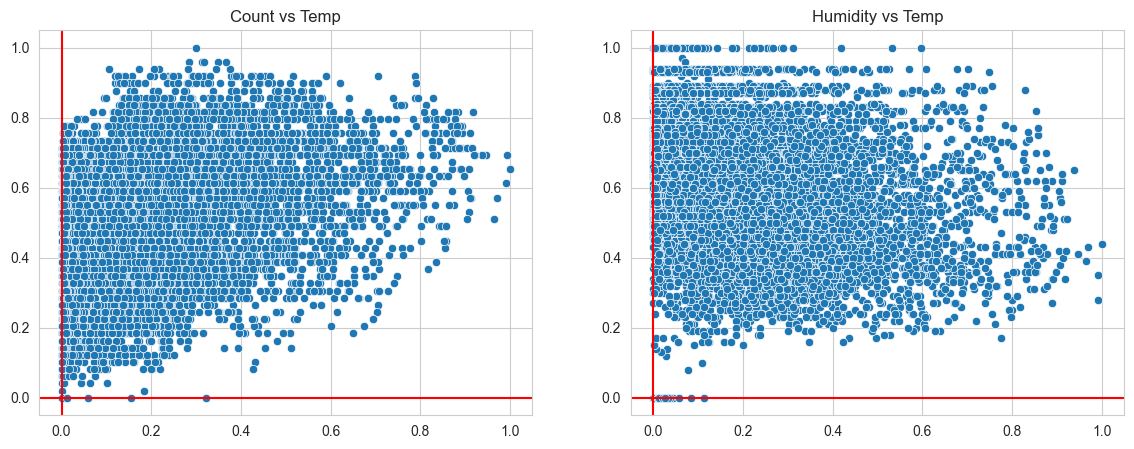

In [80]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.scatterplot(x=df_nt[:,0],y=df_nt[:,1])
plt.axhline(0,color="red")
plt.axvline(0,color="red")
plt.title("Count vs Temp")


plt.subplot(122)
sns.scatterplot(x=df_nh[:,0],y=df_nh[:,1])
plt.axhline(0,color="red")
plt.axvline(0,color="red")
plt.title("Humidity vs Temp")

plt.show()


----
### Temp vs Atemp

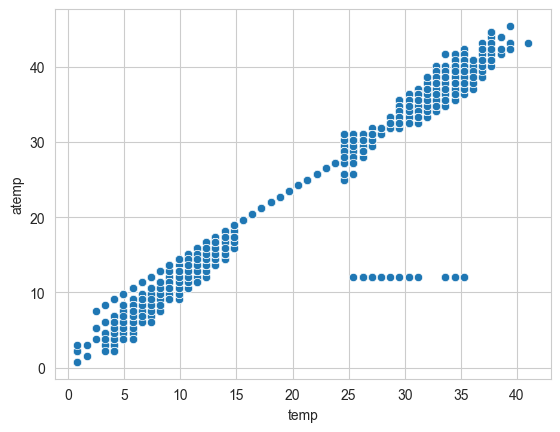

In [81]:
sns.scatterplot(x = df_new['temp'],y = df_new['atemp'])
plt.show()

In [82]:
np.cov(df_new['temp'],df_new['atemp'])[0,1]

64.91185813260256

In [83]:
pearsonr(df_new['temp'],df_new['atemp'])

PearsonRResult(statistic=0.9848667371997384, pvalue=0.0)

----
### Temp vs Count
-  positive correlation
- variance not equal

<Axes: xlabel='temp', ylabel='count'>

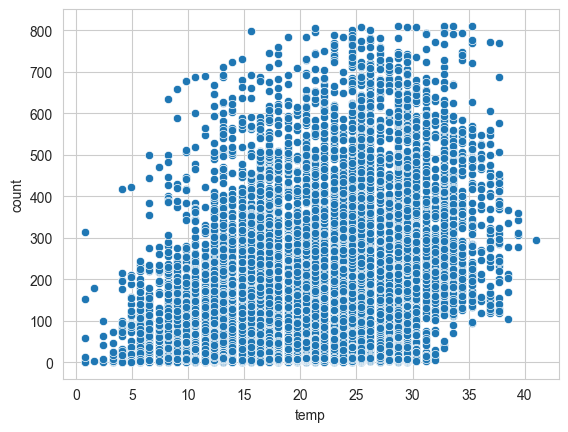

In [84]:
sns.scatterplot(x = df_new['temp'],y = df_new['count'] )

In [85]:
np.cov(df_new['temp'],df_new['count'])[0,1]

523.675433966328

In [86]:
spearmanr(df_new['temp'],df_new['count'])

SpearmanrResult(correlation=0.40148620681062575, pvalue=0.0)

In [87]:
levene(df_new['humidity'],df_new['count'])

LeveneResult(statistic=10742.822993888878, pvalue=0.0)

-----
### Humidity vs Count
- Negative Correlation
- Variance are not equal

<Axes: xlabel='humidity', ylabel='count'>

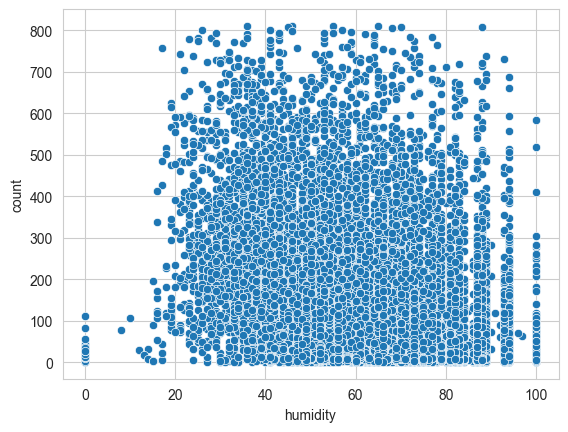

In [88]:
sns.scatterplot(x = df_new['humidity'],y =  df_new['count'])

In [89]:
spearmanr(df_new['humidity'],df_new['count'])

SpearmanrResult(correlation=-0.3505730881561481, pvalue=0.0)

In [90]:
levene(df_new['humidity'],df_new['count'])

LeveneResult(statistic=10742.822993888878, pvalue=0.0)

---
### Humidity vs Temperature
- Negative Correlation
- Variance Not Equal

<Axes: xlabel='humidity', ylabel='temp'>

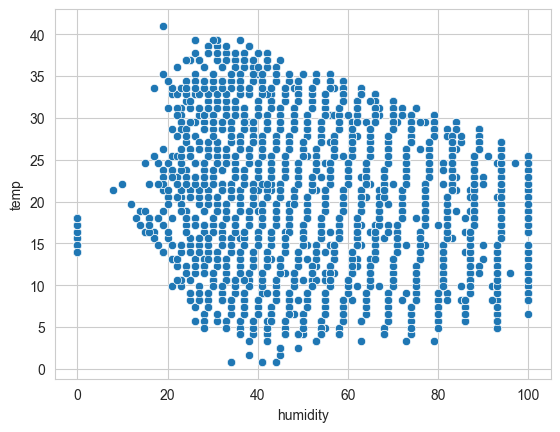

In [91]:
sns.scatterplot(x = df_new['humidity'],y =  df_new['temp'])

In [92]:
spearmanr(df_new['humidity'],df_new['temp'])

SpearmanrResult(correlation=-0.04077665548184308, pvalue=2.2285058016747413e-05)

In [93]:
levene(df_new['humidity'],df_new['temp'])

LeveneResult(statistic=8040.839176657861, pvalue=0.0)

### Creating Humidity and temp Bins

In [94]:
bins = [0,np.percentile(df_new['humidity'],25),np.percentile(df_new['humidity'],50),np.percentile(df_new['humidity'],75),np.max(df_new['humidity'])]
labels  =  ['Low','Medium-Low','Medium-High','High']
df_new.loc[:, 'humidity_bins'] = pd.cut(df_new['humidity'], bins=bins, labels=labels)
df_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name,count_bins,humidity_bins
0,2011-01-01 00:00:00,spring,0,0,clear skies,9.84,14.395,81,0.0,3,13,16,1,Jan,Low,High
1,2011-01-01 01:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,8,32,40,1,Jan,Low,High
2,2011-01-01 02:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,5,27,32,1,Jan,Low,High
3,2011-01-01 03:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,3,10,13,1,Jan,Low,Medium-High
4,2011-01-01 04:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,0,1,1,1,Jan,Low,Medium-High


In [95]:
bins = [0,np.percentile(df_new['temp'],25),np.percentile(df_new['temp'],50),np.percentile(df_new['temp'],75),np.max(df_new['temp'])]
labels  =  ['Low','Medium-Low','Medium-High','High']
df_new.loc[:, 'temp_bins'] = pd.cut(df_new['temp'], bins=bins, labels=labels)
df_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name,count_bins,humidity_bins,temp_bins
0,2011-01-01 00:00:00,spring,0,0,clear skies,9.84,14.395,81,0.0,3,13,16,1,Jan,Low,High,Low
1,2011-01-01 01:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,8,32,40,1,Jan,Low,High,Low
2,2011-01-01 02:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,5,27,32,1,Jan,Low,High,Low
3,2011-01-01 03:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,3,10,13,1,Jan,Low,Medium-High,Low
4,2011-01-01 04:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,0,1,1,1,Jan,Low,Medium-High,Low


-----
### Hour vs Count

In [96]:
df_new['hour'] = df_new['datetime'].dt.hour

[Text(0.5, 1.0, 'Count of bikes')]

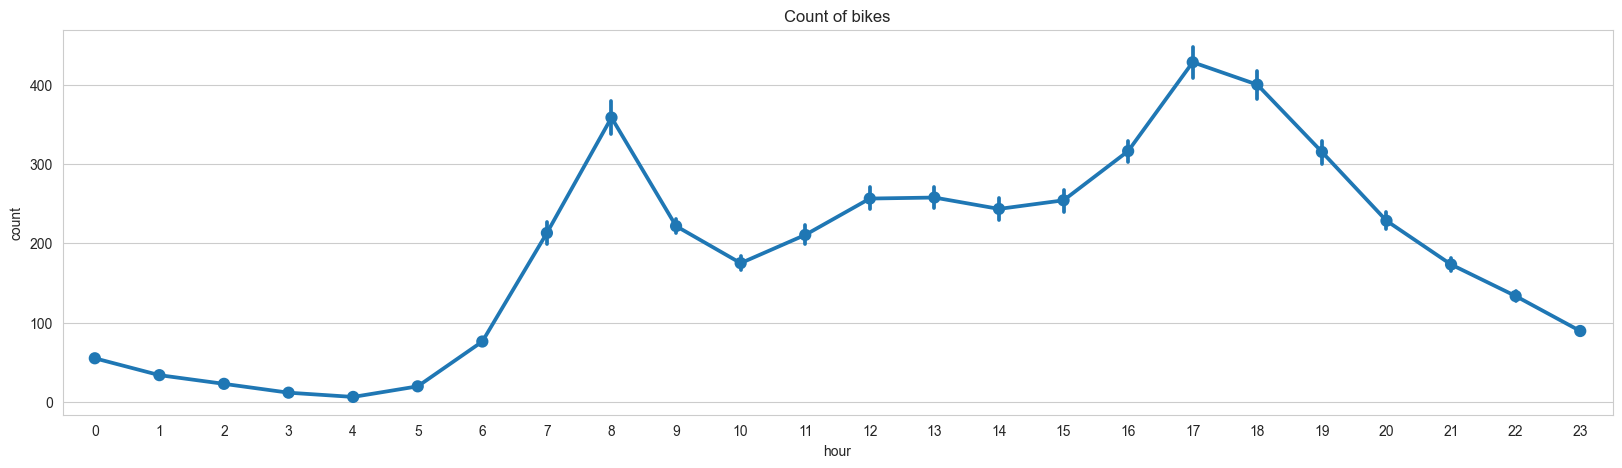

In [97]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='hour' , y ='count')
ax.set(title='Count of bikes')

[Text(0.5, 1.0, 'Count of bikes')]

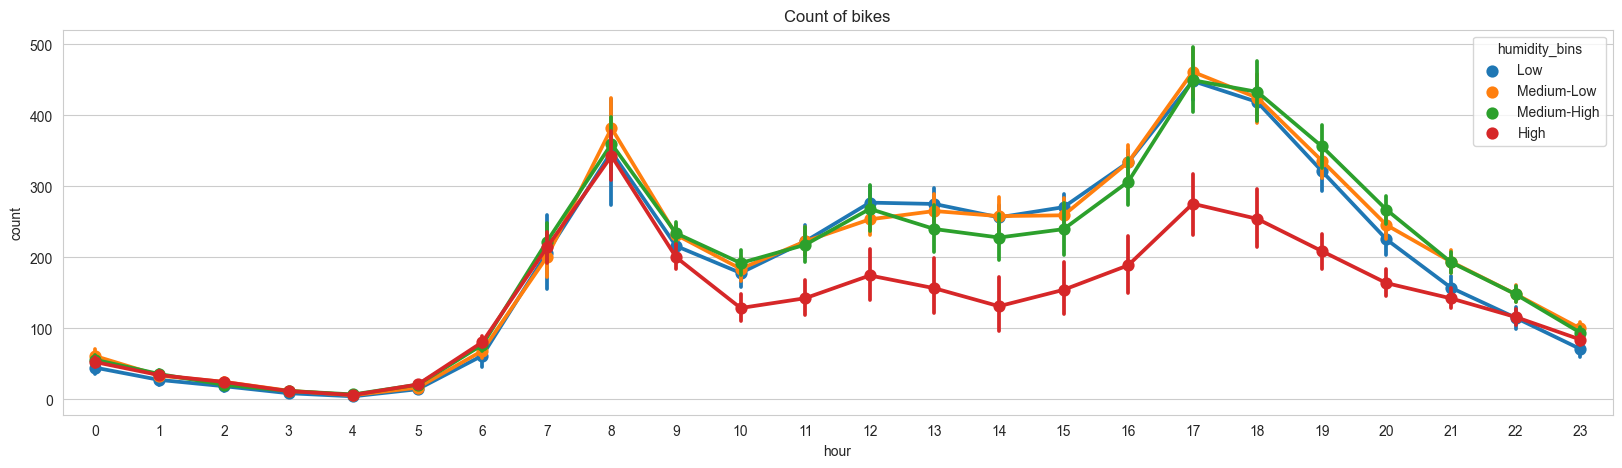

In [98]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='hour' , y ='count',hue='humidity_bins')
ax.set(title='Count of bikes')

[Text(0.5, 1.0, 'Count of bikes')]

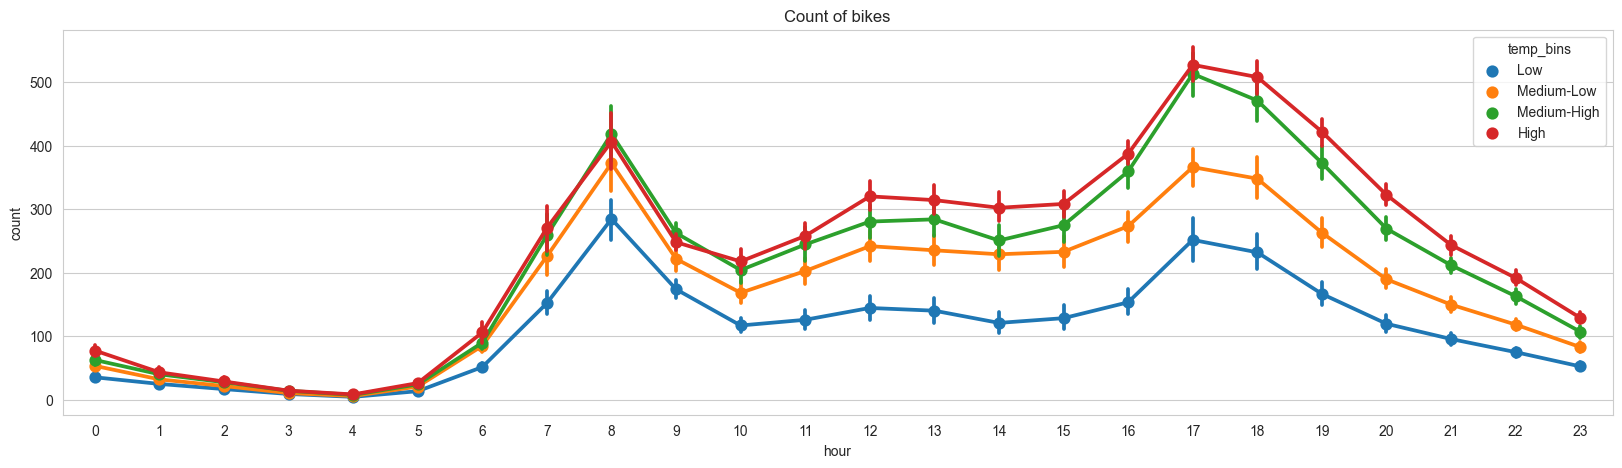

In [99]:
fig, ax = plt.subplots(figsize = (20,5))
sns.pointplot(data = df_new , x ='hour' , y ='count',hue='temp_bins')
ax.set(title='Count of bikes')

----
----
# Bi-Vairate Analysis
target variables : humidity and temp </br>
**Month vs Humidity and temp**
- We can say both Month and Humidity/Temp are dependent

-----

## Month vs Humidity and Temp

### Chi 2 Test
Ha : humidity and Month are independent </br>
Ho : humidity and Month are Dependent </br>
Result : Reject Ho

In [100]:
chi2(pd.crosstab(index=df_new['month name'],columns=df_new['humidity_bins']))

chi_stat : 1049.9400484477887
p_ value : 2.939835081467298e-199
dof : 33
expected : [[233.58672476 231.39816446 215.57318995 227.44192083]
 [230.24242143 228.08519514 212.48678965 224.18559377]
 [234.61574117 232.41753963 216.52285158 228.44386762]
 [231.78594605 229.6142579  213.9112821  225.68851395]
 [227.41262631 225.28191341 209.87522017 221.4302401 ]
 [232.55770835 230.37878928 214.62352832 226.43997404]
 [232.04320015 229.8691017  214.14869751 225.93900065]
 [226.1263558  224.00769445 208.68814314 220.17780662]
 [233.07221656 230.88847687 215.09835914 226.94094744]
 [234.35848707 232.16269584 216.28543617 228.19338092]
 [229.72791323 227.57550756 212.01195884 223.68462038]
 [229.47065913 227.32066376 211.77454343 223.43413368]]
Reject ho


<Axes: xlabel='month name', ylabel='count'>

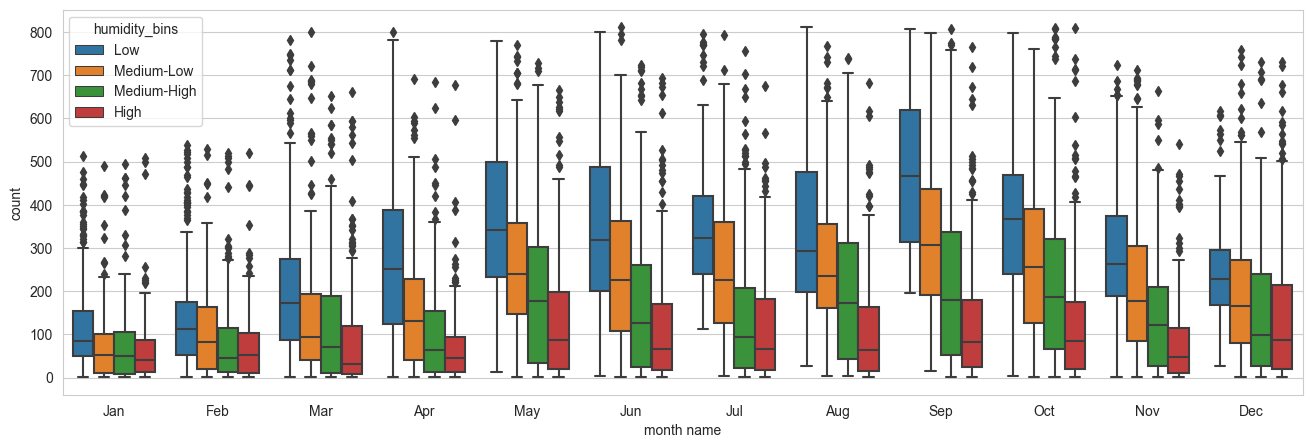

In [101]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df_new,x = 'month name',y='count',hue='humidity_bins')

Ha : Temp and Month are independent </br>
Ho : Temp and Month are Dependent </br>
Result : Reject Ho

<Axes: xlabel='month name', ylabel='count'>

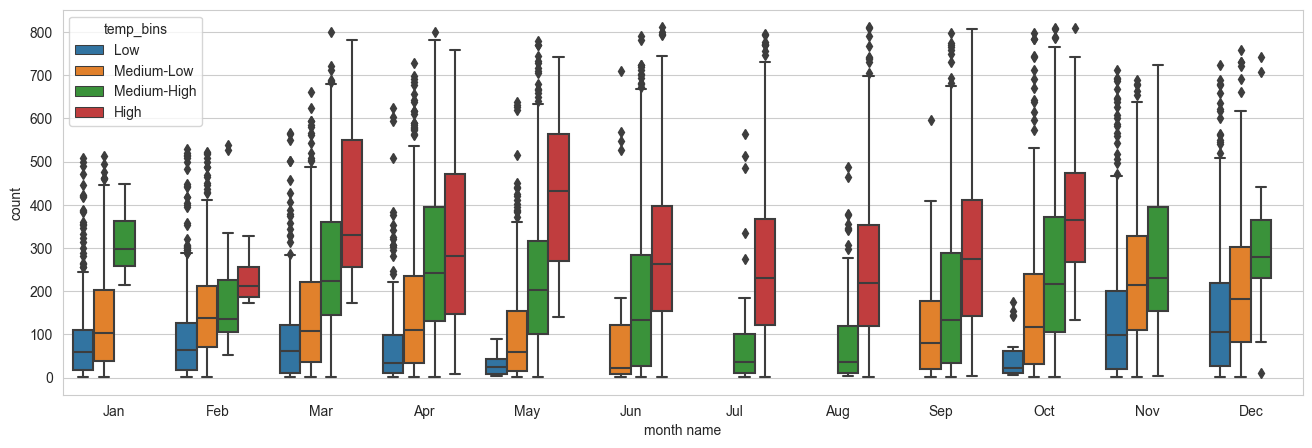

In [102]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df_new,x = 'month name',y='count',hue='temp_bins')

In [103]:
chi2(pd.crosstab(index=df_new['month name'],columns=df_new['temp_bins']))

chi_stat : 11956.89736928148
p_ value : 0.0
dof : 33
expected : [[245.79591082 226.89499491 217.82255528 217.486539  ]
 [242.27680637 223.64649829 214.70395041 214.37274493]
 [246.87871218 227.89453233 218.78212601 218.44462948]
 [243.90100842 225.14580442 216.1433065  215.80988066]
 [239.2991026  220.89777038 212.06513091 211.73799611]
 [244.71310945 225.89545749 216.86298455 216.52844852]
 [244.17170876 225.39568878 216.38319919 216.04940328]
 [243.90100842 225.14580442 216.1433065  215.80988066]
 [245.25451013 226.3952262  217.34276991 217.00749376]
 [246.60801184 227.64464798 218.54223332 218.20510686]
 [241.73540568 223.14672958 214.22416505 213.89369969]
 [241.46470534 222.89684522 213.98427237 213.65417707]]
Reject ho


In [104]:
df_new.groupby('month name')[['humidity','temp']].mean().sort_values(by=['temp','humidity'], ascending=False)

,humidity,temp
month name,,
Jul,58.519912,30.835265
Aug,63.234637,29.691330
Jun,58.980044,27.045455
Sep,71.360987,25.733475
May,68.240618,22.644128
Oct,69.690929,20.902195
Apr,55.724670,18.716410
Mar,56.678135,15.902175
Nov,60.722283,15.185752


In [105]:
df_new.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month name,count_bins,humidity_bins,temp_bins,hour
0,2011-01-01 00:00:00,spring,0,0,clear skies,9.84,14.395,81,0.0,3,13,16,1,Jan,Low,High,Low,0
1,2011-01-01 01:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,8,32,40,1,Jan,Low,High,Low,1
2,2011-01-01 02:00:00,spring,0,0,clear skies,9.02,13.635,80,0.0,5,27,32,1,Jan,Low,High,Low,2
3,2011-01-01 03:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,3,10,13,1,Jan,Low,Medium-High,Low,3
4,2011-01-01 04:00:00,spring,0,0,clear skies,9.84,14.395,75,0.0,0,1,1,1,Jan,Low,Medium-High,Low,4


-----
----
# Recomendations
- When The temperature is rising we can roll out discounts for casual users , which will increase the number of bikes for rent
- When we there's an increase in Humidity , we can place a stall for drinking water , this might create a positive image for the brand
- It's During the rainfall we can see se less number of users , the best thing which can be done here is to provide a covered area for customers to park their bikes when it is raining. This will protect the bikes from the elements and will also make it more convenient for customers to rent bikes.
- The number of bike rentals is lower during hours of high humidity and low temperature ,  I think during these times rolling out promotion and Discounts might Help
-Make sure all electric bikes are in good working order and are properly maintained. This will help ensure that riders have a positive experience, even on humid days.